<a href="https://colab.research.google.com/github/Piat0046/PractiseProject/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project1

#데이터셋 불러오기


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/vgames2.csv") # df 데이터 저장
df = df.drop('Unnamed: 0', axis = 1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


##데이터 전처리

In [3]:
def trans(x): 
  a = df[x.str.contains('K')].index             # K를 포함한 셀 선택
  x.replace('K','', regex=True, inplace = True) # K 제거
  x.replace('M','', regex=True, inplace = True) # M 제거
  x = pd.to_numeric(x)                          # 형변환
  for j in a:                                   # K가 들어있던 행 단위변경
    x[j] = x[j] / 1000
  return x

df['NA_Sales'] = trans(df['NA_Sales'])         
df['EU_Sales'] = trans(df['EU_Sales'])
df['JP_Sales'] = trans(df['JP_Sales'])
df['Other_Sales'] = trans(df['Other_Sales'])
df.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [4]:
df1 = df
df1['Total'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'] #total 추가

a = df[(df['Year'] < 100) & (df['Year'] >= 80)].index
for j in a:                                   # K가 들어있던 행 단위변경
  df['Year'][j] = df['Year'][j]+1900

a = df[(df['Year'] < 20) & (df['Year'] >= 0)].index
for j in a:                                   # K가 들어있던 행 단위변경
  df['Year'][j] = df['Year'][j]+2000

df['Year'] = df['Year'].fillna(0)                      #결측치 0으로 대체
df['Genre'] = df['Genre'].fillna('None')               #결측치 None으로 대체
df['Publisher'] = df['Publisher'].fillna('None')       #결측치 None으로 대체

df1.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01,0.08


## 지역별 장르 선호도
각 지역별 장르 선호도를 구하고, 시각화

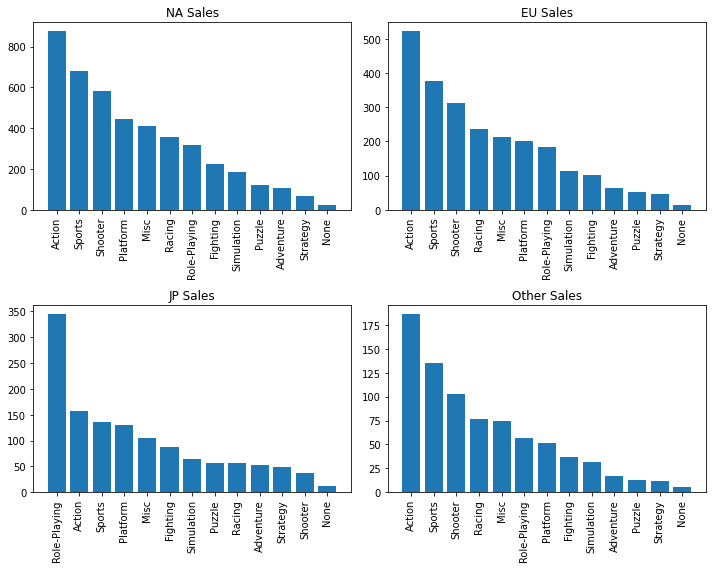

In [5]:
import matplotlib.pyplot as plt
country = np.array(['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales']) #지역별 array 생성

genre = pd.DataFrame([])  # 장르 데이터 프레임 생성

for i in country:                             #장르별 총합
  genre[i] = df[i].groupby(df['Genre']).sum() 

ax = plt.subplot # 그래프 선언
plt.figure(figsize=(10,8)) #그래프 크기 설정
ax(221).bar(genre['NA_Sales'].sort_values(ascending=False).index,genre['NA_Sales'].sort_values(ascending=False)); # 그래프 정의
plt.xticks(rotation = 90) #x축 레이블 회전
plt.title('NA Sales') # 제목 설정
ax(222).bar(genre['EU_Sales'].sort_values(ascending=False).index,genre['EU_Sales'].sort_values(ascending=False));
plt.xticks(rotation = 90)
plt.title('EU Sales')
ax(223).bar(genre['JP_Sales'].sort_values(ascending=False).index,genre['JP_Sales'].sort_values(ascending=False));
plt.xticks(rotation = 90)
plt.title('JP Sales')
ax(224).bar(genre['Other_Sales'].sort_values(ascending=False).index,genre['Other_Sales'].sort_values(ascending=False));
plt.xticks(rotation = 90)
plt.title('Other Sales')
plt.tight_layout() # 그래프간 간격조정
plt.show()


3개의 지역에서 액션이 가장 높은 선호도를 가짐
jp지역에서도 2위를 가지며 가장 안정적인 장르

한가지드는 의문
과연 액션 장르가 현 트렌드가 잘맞는지, 혹은 최근들어 트렌드가 변화하고 있는건지 확인 필요


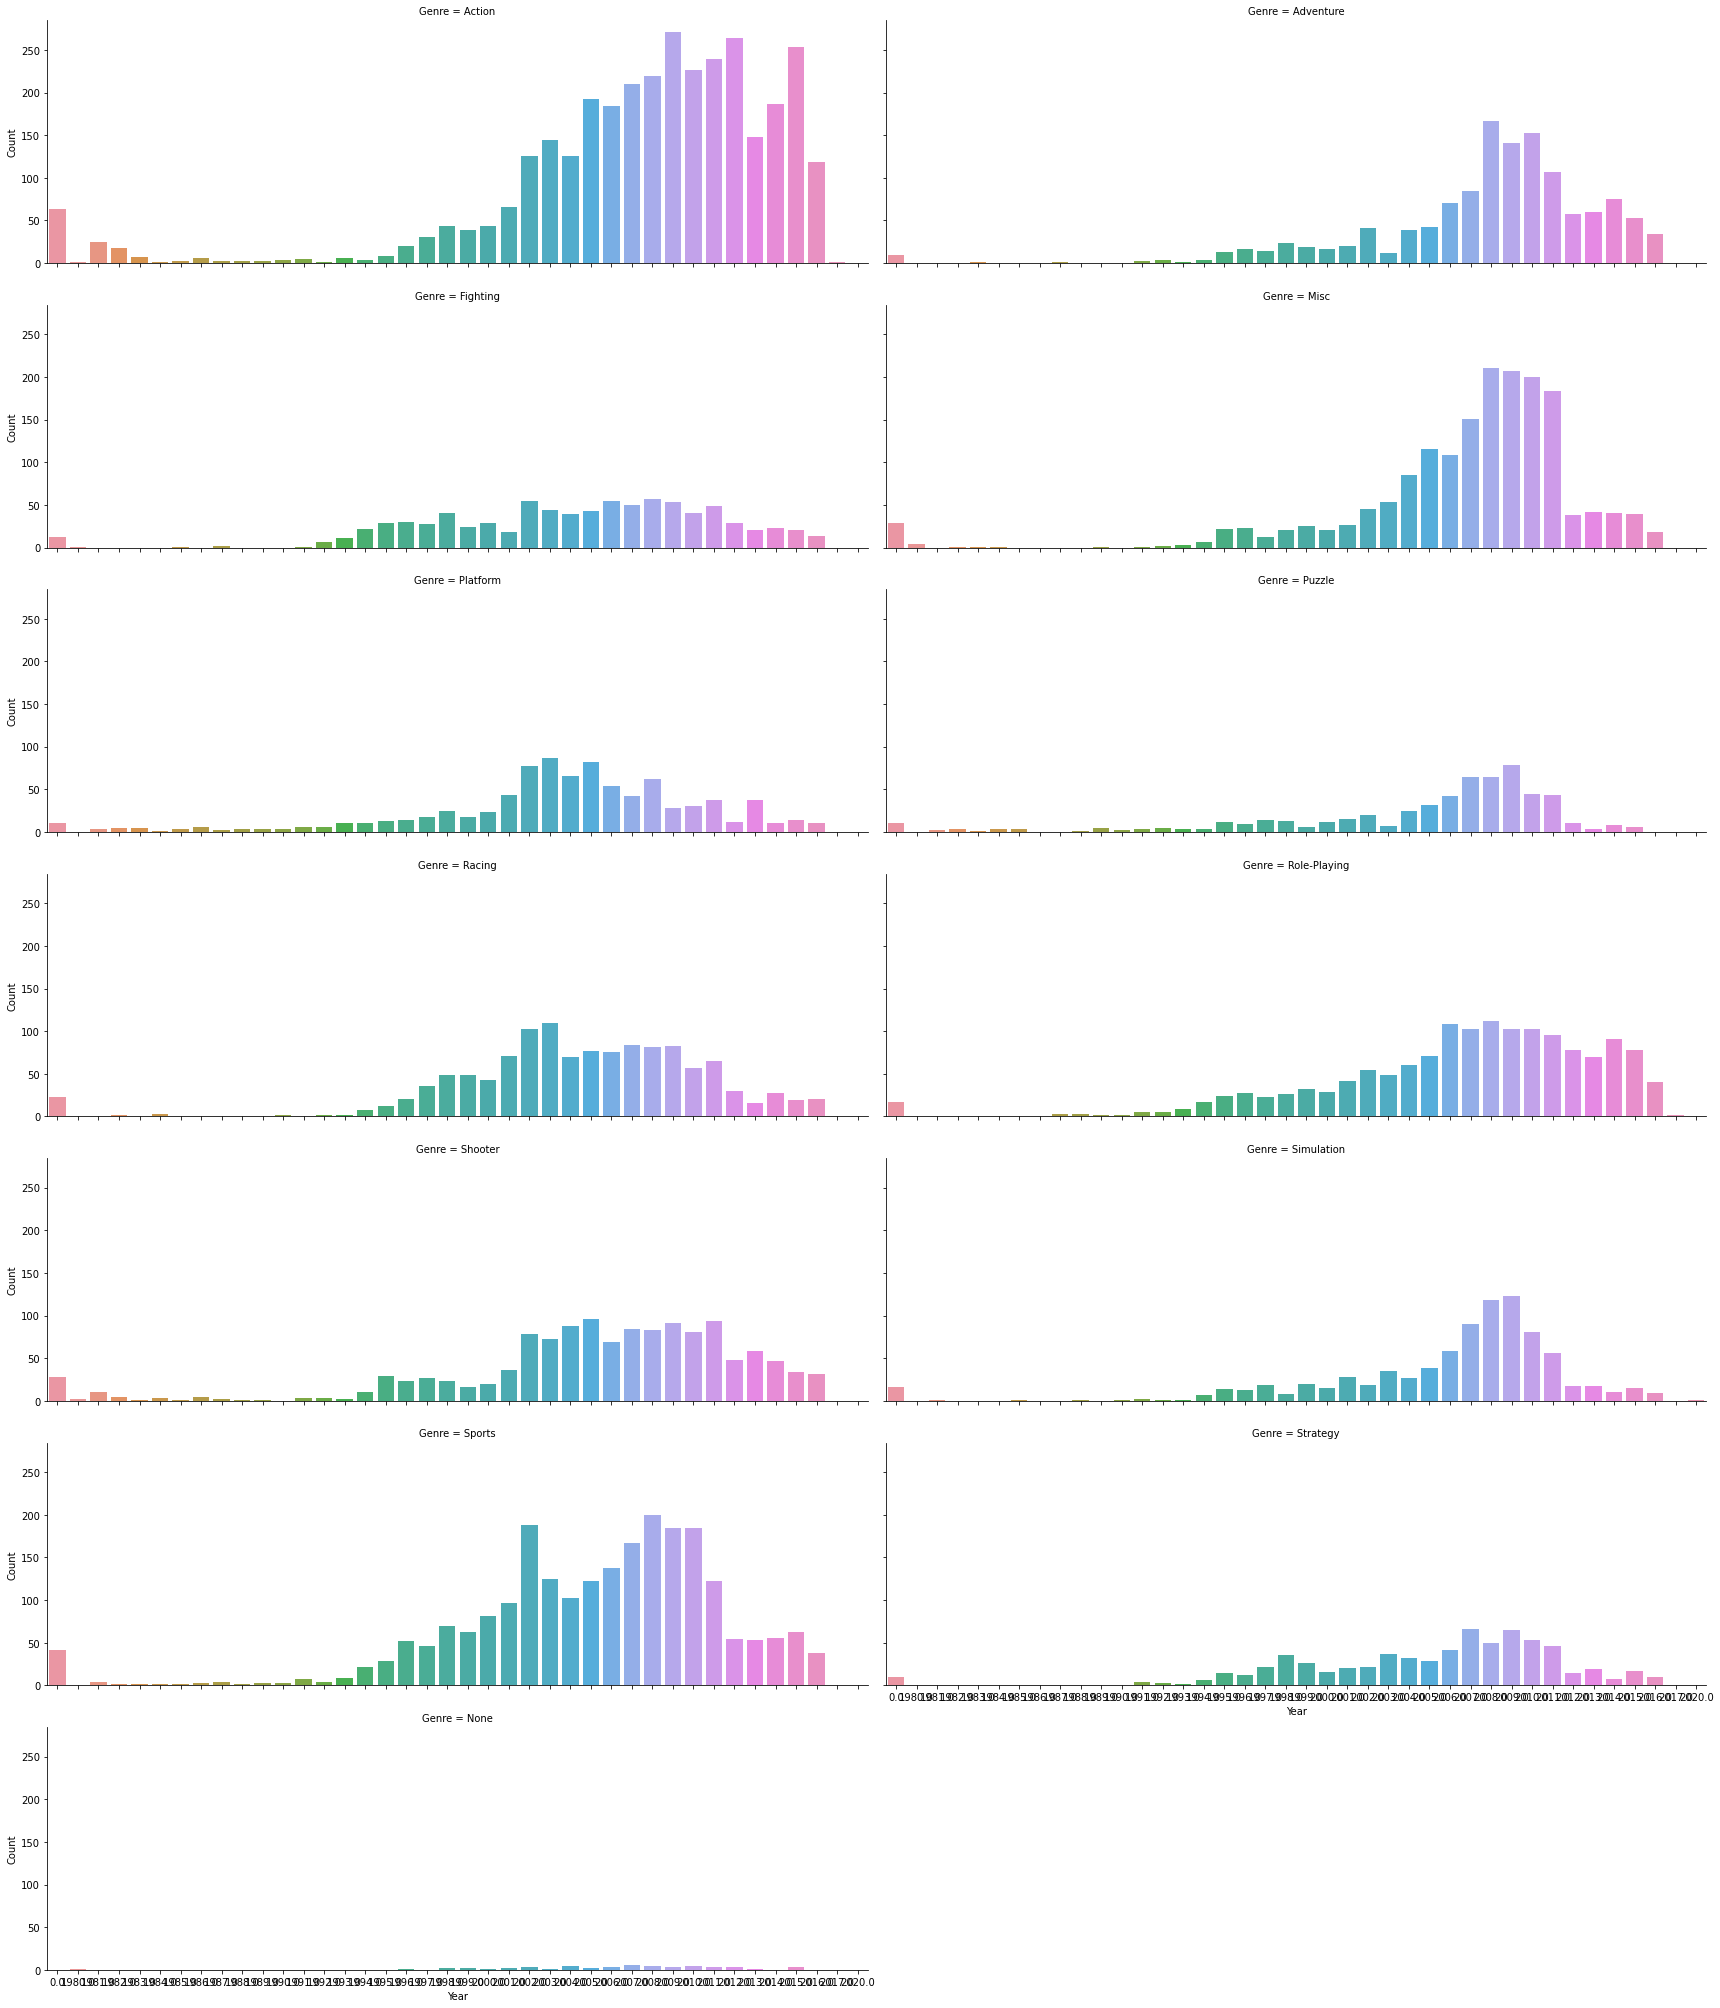

In [6]:
import seaborn as sns

YG = pd.DataFrame(df.groupby(['Year','Genre']).size()).reset_index() # 연도별 장르
YG.rename(columns = {0 : 'Count'}, inplace = True)


YG_fig = sns.catplot(x = 'Year', y = 'Count', col = 'Genre', kind = 'bar', col_wrap = 2, data = YG, height = 4  , aspect = 3)


 ### 1980~2017년도 까지의 년도,장르별 판매평균액
 

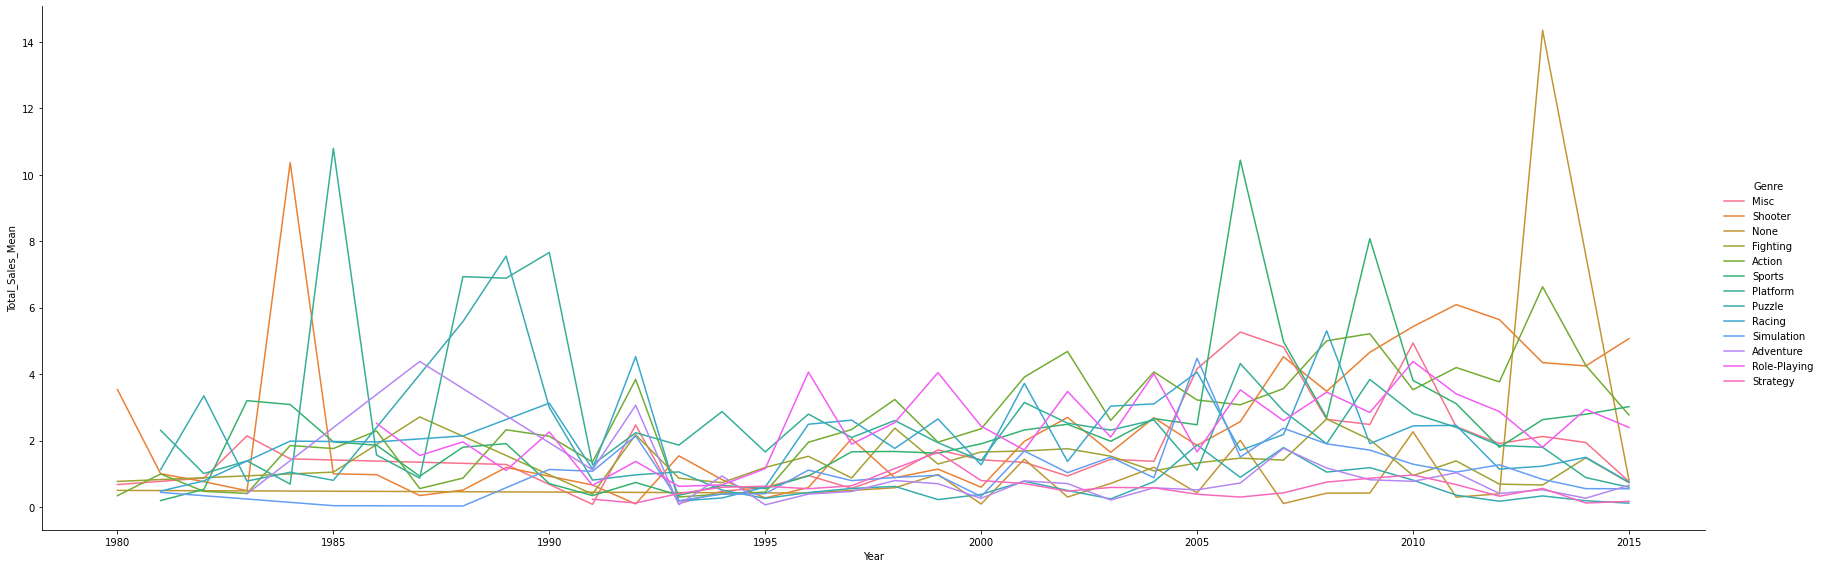

In [7]:
colunms = ['Year', 'Genre', 'Total_Sales_Mean']
trand = pd.DataFrame(columns=colunms)

for i in range(1,2016):         # 1980~2017년도 까지의 년도,장르별 판매평균액
  b = df[df['Year'] == i]
  f = []
  for c in b.Genre.value_counts().index: 
    f.append(c)
    trand = trand.append({'Year' : i, 'Genre' : c, 'Total_Sales_Mean' : b[b['Genre'] == c]['Total'].sort_values(ascending=False).head(10).mean()},ignore_index=True) # 장르별 판매장수가 높은 10종류의 게임의 평균 
                          # i = 년도    c = 장르
 
sns.relplot(data=trand, x="Year", y="Total_Sales_Mean", hue="Genre", 
                                                        kind="line", 
                                                        height=8, 
                                                        aspect=3); # 그래프 시각화

평균치로 보아 이상치인 None의 장르를 제외하고는 2010~ 2015년의 트렌드는 액션과 슈터의 장르로 보인다.
출시작은 액션이 압도적으로 많았으나, 평균 흥행성적에는 액셕과 슈터가 비슷하였고,
경쟁사가 상대적으로 적은 슈터가 개발방향으로 좋아보인다.

단, 2016이후의 데이터가 부족하여 현재2020년까지의 트렌드로 보기에는 다소 어려울수 있음

### 흥행성적이 높은 게임에 대한 분석
2010년부터 2017년 사이의 흥행성적이 높은 게임에 대한 분석
각 년도별 3종목씩 뽑아 분석하였다.

In [11]:
c = df[df['Year'] == 2005].sort_values(by = 'Total', ascending=False).head(3)
for i in range(2006,2017):         
  b = df[df['Year'] == i].sort_values(by = 'Total', ascending=False).head(3).reset_index(drop = True)
  if b['Name'][0] == b['Name'][1]:                                                                   # 동일한 이름의 게임이 있을 경우 플랫폼과 판매금액을 합침
    b['Platform'][0] = b['Platform'][0]+b['Platform'][1]
    b['NA_Sales'][0] = b['NA_Sales'][0]+b['NA_Sales'][1]
    b['EU_Sales'][0] = b['EU_Sales'][0]+b['EU_Sales'][1]
    b['JP_Sales'][0] = b['JP_Sales'][0]+b['JP_Sales'][1]
    b['Other_Sales'][0] = b['Other_Sales'][0]+b['Other_Sales'][1]
    b.drop(1, inplace = True)
    b = b.append(df[df['Year'] == i].sort_values(by = 'Total', ascending=False).head(4).reset_index(drop = True).tail(1)).reset_index(drop = True)
  elif (b['Name'][0] == b['Name'][2]):
    b['Platform'][0] = b['Platform'][0]+b['Platform'][2]
    b['NA_Sales'][0] = b['NA_Sales'][0]+b['NA_Sales'][2]
    b['EU_Sales'][0] = b['EU_Sales'][0]+b['EU_Sales'][2]
    b['JP_Sales'][0] = b['JP_Sales'][0]+b['JP_Sales'][2]
    b['Other_Sales'][0] = b['Other_Sales'][0]+b['Other_Sales'][2]
    b.drop(2, inplace = True)
    b = b.append(df[df['Year'] == i].sort_values(by = 'Total', ascending=False).head(4).reset_index(drop = True).tail(1)).reset_index(drop = True)
  elif (b['Name'][1] == b['Name'][2]):
    b['Platform'][1] = b['Platform'][1]+b['Platform'][2]
    b['NA_Sales'][1] = b['NA_Sales'][1]+b['NA_Sales'][2]
    b['EU_Sales'][1] = b['EU_Sales'][1]+b['EU_Sales'][2]
    b['JP_Sales'][1] = b['JP_Sales'][1]+b['JP_Sales'][2]
    b['Other_Sales'][1] = b['Other_Sales'][1]+b['Other_Sales'][2]
    b.drop(2, inplace = True)
    b = b.append(df[df['Year'] == i].sort_values(by = 'Total', ascending=False).head(4).reset_index(drop = True).tail(1)).reset_index(drop = True)
  c = pd.merge(c,b, how='outer')

c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75
1,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.43
2,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
3,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
5,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
6,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
7,Halo 3,X360,2007.0,Shooter,Microsoft Game Studios,7.97,2.83,0.13,1.21,12.14
8,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52
9,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83


In [9]:
c

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
2,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
3,Call of Duty: Modern Warfare 3,X360PS3,2011.0,Shooter,Activision,14.57,10.10,0.62,2.94,14.76
4,Mario Kart 7,3DS,2011.0,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
5,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79
6,Call of Duty: Black Ops II,PS3X360,2012.0,Shooter,Activision,13.24,10.18,0.72,3.64,14.04
7,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,3.66,3.07,2.47,0.63,9.83
8,Halo 4,X360,2012.0,Shooter,Microsoft Game Studios,6.63,2.36,0.04,0.73,9.76
9,Grand Theft Auto V,PS3X360,2013.0,Action,Take-Two Interactive,16.64,14.58,1.03,5.52,21.39
